In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/youtube_comments_cleaned.csv')

In [3]:
df.head()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2


In [4]:
from preprocessing_functions import clean_text, cleaning_text_lenghth,add_comment_length

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032225 entries, 0 to 1032224
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   CommentID        1032225 non-null  object
 1   VideoID          1032225 non-null  object
 2   VideoTitle       1032225 non-null  object
 3   AuthorName       1031594 non-null  object
 4   AuthorChannelID  1032225 non-null  object
 5   CommentText      1032225 non-null  object
 6   Sentiment        1032225 non-null  object
 7   Likes            1032225 non-null  int64 
 8   Replies          1032225 non-null  int64 
 9   PublishedAt      1032225 non-null  object
 10  CountryCode      1032225 non-null  object
 11  CategoryID       1032225 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 94.5+ MB


In [6]:
df=add_comment_length(df)

In [7]:
df=cleaning_text_lenghth(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019316 entries, 0 to 1019315
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   CommentID        1019316 non-null  object
 1   VideoID          1019316 non-null  object
 2   VideoTitle       1019316 non-null  object
 3   AuthorName       1018690 non-null  object
 4   AuthorChannelID  1019316 non-null  object
 5   CommentText      1019316 non-null  object
 6   Sentiment        1019316 non-null  object
 7   Likes            1019316 non-null  int64 
 8   Replies          1019316 non-null  int64 
 9   PublishedAt      1019316 non-null  object
 10  CountryCode      1019316 non-null  object
 11  CategoryID       1019316 non-null  int64 
 12  Comment_Length   1019316 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 101.1+ MB


In [9]:
df.isna().sum()

CommentID            0
VideoID              0
VideoTitle           0
AuthorName         626
AuthorChannelID      0
CommentText          0
Sentiment            0
Likes                0
Replies              0
PublishedAt          0
CountryCode          0
CategoryID           0
Comment_Length       0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df["CommentText"] = df["CommentText"].apply(clean_text)

In [12]:
df["VideoTitle"] = df["VideoTitle"].apply(clean_text)

In [13]:
df = df.drop(columns=["CommentID", "VideoID", "AuthorChannelID", "VideoTitle",])

In [14]:
df['Sentiment']=df['Sentiment'].map({'Positive':2,'Negative':0,'Neutral':1})

In [15]:
df['CountryCode'].unique()

array(['NZ', 'AU', 'IN', 'US', 'IE', 'DE', 'PH', 'CA', 'GB'], dtype=object)

In [16]:
df = pd.get_dummies(df, columns=["CountryCode"], prefix="CC")

In [17]:
df['CategoryID'].unique()

array([ 1, 17, 27,  2, 28, 25, 15, 20, 26, 22, 24])

In [18]:
df = pd.get_dummies(df, columns=["CategoryID"], prefix="CAT")

In [19]:
from preprocessing_functions import encoding_date
df=encoding_date(df)

In [20]:
df.drop(columns=['AuthorName'],inplace=True)

Testing feature importance

In [21]:
df_small = df.sample(50000, random_state=42)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=5)
X_text = tfidf.fit_transform(df_small["CommentText"])

In [23]:
numeric_features = ["Likes","Replies","Comment_Length","Month","DayOfWeek","Hour","IsWeekend"]
onehot_features = [col for col in df_small.columns if col.startswith("CC_") or col.startswith("CAT_")]
X_other = df_small[numeric_features + onehot_features].astype(float)

In [24]:
from scipy.sparse import hstack

X = hstack([X_text, X_other])
y = df_small["Sentiment"]

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


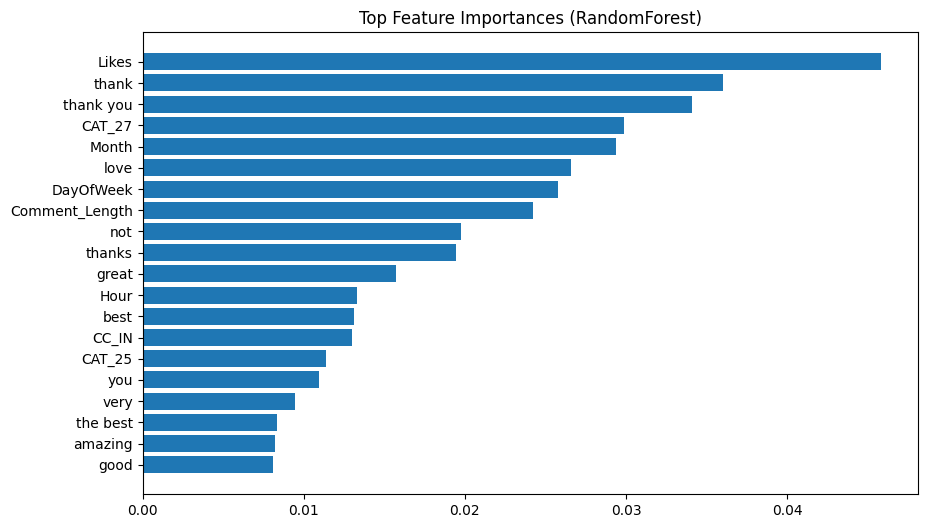

In [26]:
importances = rf.feature_importances_
tfidf_feature_names = tfidf.get_feature_names_out()
other_feature_names = X_other.columns
feature_names = np.concatenate([tfidf_feature_names, other_feature_names])
sorted_idx = np.argsort(importances)[::-1][:30]

top_n = 20
plt.figure(figsize=(10,6))
plt.barh([feature_names[i] for i in sorted_idx[:top_n]], importances[sorted_idx[:top_n]])
plt.gca().invert_yaxis()
plt.title("Top Feature Importances (RandomForest)")
plt.show()

In [27]:
df.to_csv('../Data/youtube_comments_preprocessed.csv', index=False)

Most representetive words

In [28]:
text_col = "CommentText" 
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1, 2),min_df=5)
X_text = tfidf.fit_transform(df_small[text_col])
y = df_small["Sentiment"]   # 0 = negative, 1 = neutral, 2 = pozitive
feature_names = tfidf.get_feature_names_out()

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1, multi_class="ovr")   # one-vs-rest

log_reg.fit(X_text, y)

d:\sda\Proiecte\sentiment-analysis-youtube\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'ovr'


In [32]:
sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}

def show_top_words(class_idx, n=20):
    coef = log_reg.coef_[class_idx]
    top_pos = np.argsort(coef)[-n:][::-1]   
    print(f"\nTop {n} words for sentiment {sentiment_labels[class_idx]}:\n")
    for i in top_pos:
        print(f"{feature_names[i]:<20}  coef = {coef[i]:.4f}")

In [33]:
show_top_words(2, n=20)


Top 20 words for sentiment Positive:

love                  coef = 5.8912
great                 coef = 5.8667
awesome               coef = 5.6745
thanks                coef = 4.8781
amazing               coef = 4.7627
best                  coef = 4.6014
beautiful             coef = 4.5482
thank                 coef = 4.4056
glad                  coef = 4.0628
excellent             coef = 4.0255
finally               coef = 3.9075
thank you             coef = 3.8163
brilliant             coef = 3.7642
nice                  coef = 3.6628
perfect               coef = 3.6220
wonderful             coef = 3.6210
good                  coef = 3.5973
proud                 coef = 3.5624
fantastic             coef = 3.4128
bless                 coef = 3.4097


In [34]:
show_top_words(0, n=20)


Top 20 words for sentiment Negative:

error                 coef = 5.5373
terrible              coef = 5.1451
fake                  coef = 3.9812
sad                   coef = 3.9513
disgusting            coef = 3.8992
dumb                  coef = 3.7736
awful                 coef = 3.7301
garbage               coef = 3.7298
idiot                 coef = 3.6881
completely            coef = 3.6772
cringe                coef = 3.5767
not                   coef = 3.4611
racist                coef = 3.3074
stupid                coef = 3.2254
shouldn               coef = 3.2201
bullshit              coef = 3.2034
pathetic              coef = 3.1802
annoying              coef = 3.1782
waste                 coef = 3.1739
useless               coef = 3.1269


In [35]:
show_top_words(1, n=20)


Top 20 words for sentiment Neutral:

is it                 coef = 3.2373
can you               coef = 3.1116
is there              coef = 2.9932
name                  coef = 2.7966
which                 coef = 2.7472
question              coef = 2.5769
is this               coef = 2.5570
be like               coef = 2.3571
where                 coef = 2.2771
how do                coef = 2.2581
what about            coef = 2.1628
do you                coef = 2.1425
kya                   coef = 2.1238
kon                   coef = 2.1227
plz                   coef = 2.0871
curious               coef = 2.0794
theme                 coef = 2.0794
kaise                 coef = 2.0673
or                    coef = 2.0647
make video            coef = 2.0011


Unfrortunately, because of the API that I am going to use, i will have to drop Country Code and CategoryID

In [36]:
df.drop(columns=onehot_features,inplace=True)

In [37]:
df.head()

,CommentText,Sentiment,Likes,Replies,Comment_Length,Month,DayOfWeek,Hour,IsWeekend
0,anyone know what movie this is,1,0,2,31,1,2,0,0
1,the fact they're holding each other back while...,2,0,0,79,1,0,23,0
2,waiting next video will be,1,1,0,27,7,0,13,0
3,thanks for the great video i don't understand ...,1,0,1,488,9,2,12,0
4,good person helping good people this is how it...,2,3,1,94,1,4,19,0


In [38]:
df.to_csv('../Data/youtube_comments_preprocessed_v2.csv', index=False)

In [ ]:
df.isna().sum()